In [ ]:
!pip install fastai --upgrade

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.corpus import stopwords
nltk.download("vader_lexicon") ## Downloading vader lexicon as it contains that 
#words which are build upon social media like twitter.

nltk.download('stopwords')

from fastai.text.all import *

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!unzip '/content/drive/MyDrive/finbox_nlp_test_100k.csv.zip' -d '/content/finbox/'

Archive:  /content/drive/MyDrive/finbox_nlp_test_100k.csv.zip
  inflating: /content/finbox/finbox_nlp_test_100k.csv  
  inflating: /content/finbox/__MACOSX/._finbox_nlp_test_100k.csv  


In [2]:
!unzip '/content/finbox_nlp_test_100k.csv.zip' -d '/content/finbox/'

Archive:  /content/finbox_nlp_test_100k.csv.zip
  inflating: /content/finbox/finbox_nlp_test_100k.csv  
  inflating: /content/finbox/__MACOSX/._finbox_nlp_test_100k.csv  


### ***Loading Dataset & Preprocessing***

In [3]:
df = pd.read_csv('/content/finbox/finbox_nlp_test_100k.csv')

In [4]:
df.head(10)

,created_at,text,is_retweet
0,2019-04-22 14:53:19,"If my heart can barely handle a break up, I don<U+2019>t even want to know what<U+2019>s going to happen to it on the next episode of Game of Thrones",False
1,2019-05-06 15:23:09,10 Interesting Facts About the 'Game of Thrones' Battle of Winterfell Episode (PHOTOS) https://t.co/X04oQvDZUt,False
2,2019-04-16 15:15:18,The 10 Grateful Dead References in Game of Thrones You Need in Preparation for the Final Season https://t.co/r0hpsoDfQt via @Ticketfly,False
3,2019-04-15 20:28:42,It’s just really interesting that Game of Thrones has been building to these big reunions and none of them are satisfying? Like the whole show was built around these people meeting eachother again and when it happens its only ever rushed and cold. Always weird acting/direction.,False
4,2019-04-29 02:09:12,I AM STRESSED AF WATCHING GAME OF THRONES YAAAAALLLL!!!,False
5,2019-04-29 15:32:53,Who loves game of thrones? We here at UDCC cant get enough of it! #BattleOfWinterfell #GamefThrones #BattleForWinterfell #UDCC #gosharks,False
6,2019-05-20 10:32:30,OST ~ Game of Thrones Season 4 LIMITED Tour Edition 2LP (2014)\n<U+2022>\n\n #<U+0001F525> #<U+2744><U+FE0F> #forthethrone #forthewild #got #gotfinale #homeboxoffice #in12inchwetrust #killemall #killyouridols #killyourtv #lovekillsduty #dutykillslove<U+2026> https://t.co/4KIGo4tG8U,False
7,2019-05-04 01:59:37,"The next time everyone<U+2019>s getting into a new Avengers/Game of Thrones type pop culture moment, can someone give me a heads up so I can get in on it before I have completely missed the zeitgeist? Thank you.",False
8,2019-05-24 13:49:06,@ComplexSports @Complex @PUSHA_T Aaron Rodgers game of thrones extra <U+0001F602><U+0001F602>,False
9,2019-04-29 06:19:24,game of thrones was LIT https://t.co/hn8P0SlF43,False


#### **I am using a list of custom stopwords which is meant for twitter tweets and after creating this list I am extending then to the nltk common stopwords**

In [5]:
STOPWORDS = ['a','about','above','across','after','again','against','all','almost','alone','along','already',
'also','although','always','among','an','and','another','any','anybody','anyone','anything','anywhere','are',
'area','areas','around','as','ask','asked','asking','asks','at','away','b','back''backed','backing','backs',
'be','became','because','become','becomes','been','before','began','behind','being','beings','best','better','between',
'big','both','but','by','c','came','can','cannot','case','cases','certain','certainly','clear','clearly','come','could','d','did','differ','different','differently','do','does','done','down','downed','downing','downs',
'during','e','each','either','end','ended','ending','ends','enough','even','evenly','ever','every','everybody','everyone','everything','everywhere','f','face','fact','facts','far','felt','few','find','finds','first','for','four','from','full','fully','further','furthered','furthering','furthers','g','gave','general','generally','get','gets','give','given','gives','go',
'going','good','goods','got','great','greatest','group','grouped','grouping','groups','h','had','has','have','having','he',
'her','here','herself','high','higher','highest','him','himself','his','how','however','i','if','important',
'in','interest','interested','interesting','interests','into','is','it','its','itself','j','just','k','keep','keeps','kind','knew','know','known','knows','l','largely','last','later','latest','least',
'less','let','lets','like','likely','long','longer','longest','m','made','make','making','man','many','may','me','member','members','men','might','more','most','mostly','mr','mrs','much',
'must','my','myself','n','necessary','need','needed','needing','needs','never','new','newer','newest','next','no','nobody','non','noone',
'not','nothing','now','nowhere','number','numbers','o','of','off','often','old','older','oldest','on','once','one',
'only','open','opened','opening','opens','or','order','ordered','ordering','orders','other','others','our','out','over','p','part','parted','parting',
'parts','per','perhaps','place','places','point','pointed','pointing','points','possible','present','presented','presenting','presents','problem','problems','put','puts','q','quite','r','rather','really','right','room','rooms','s','said','same','saw','say','says','second','seconds','see','seem','seemed','seeming','seems','sees','several','shall','she','should',
'show','showed','showing','shows','side','sides','since','small','smaller','smallest','so''some','somebody','someone','something','somewhere','state','states','still','such','sure','t',
'take','taken','than','that','the','their','them','then','there','therefore','these','they','thing','things','think','thinks','this','those','though',
'thought','thoughts''three','through','thus','to','today','together','too','took','toward','turn','turned','turning','turns','two','u','under','until','up','upon','us','use',
'used','uses','v','very','w','want','wanted','wanting','wants','was','way','ways','we','well','wells','went','were','what','when','where','whether',
'which','while','who','whole','whose','why','will','with','within','without','work','worked','working','works','would','x','y','year','years','yet''you','young','younger','youngest','your','yours','z']

In [6]:
## A cleaning funtion as in some features we are having special cheracters + emojis, 
## and some part of funtion 

Combined = re.compile('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)') #This will remove every link,symbols,bad_symbols form text

unicodes = re.compile('u\d+') # for unicodes
ALL_STOPWORDS = stopwords.words('english')
ALL_STOPWORDS.extend(STOPWORDS) #NLTK STOPWORDS+CUSTOM TWITTER STOPWORDS

def clean_text(text):
    
    if(text!=text):
        return ""
    text = text.lower() # lowercase text
    
    
    text = Combined.sub('',text)
    text = unicodes.sub('',text)
    

    text = ' '.join(word for word in text.split() if word not in ALL_STOPWORDS) # delete stopwors from text
    return text

clean_train_data = dict()
clean_train_data['text'] = df['text'].apply(clean_text)
clean_train_data['is_retweet'] = df['is_retweet']

In [7]:
clean_train_data['text'][1]

'10 game thrones battle winterfell episode photos'

In [8]:
clean_train_data_df = pd.DataFrame(clean_train_data)
clean_train_data_df.to_csv("/content/clean_train.csv")

In [9]:
clean_train_data = pd.read_csv('/content/clean_train.csv')

In [10]:
clean_train_data.head(50)

,Unnamed: 0,text,is_retweet
0,0,heart barely handle break dont whats happen episode game thrones,False
1,1,10 game thrones battle winterfell episode photos,False
2,2,10 grateful dead references game thrones preparation final season via,False
3,3,game thrones building reunions none satisfying built people meeting eachother happens rushed cold weird actingdirection,False
4,4,stressed af watching game thrones yaaaaallll,False
5,5,loves game thrones udcc cant battleofwinterfell gamefthrones battleforwinterfell udcc gosharks,False
6,6,ost game thrones season 4 limited tour edition 2lp 2014 f525 ufe0f forthethrone forthewild gotfinale homeboxoffice in12inchwetrust killemall killyouridols killyourtv lovekillsduty dutykillslove,False
7,7,time everyones getting avengersgame thrones type pop culture moment heads completely missed zeitgeist thank,False
8,8,aaron rodgers game thrones extra f602f602,False
9,9,game thrones lit,False


In [11]:
clean_train_data.drop(['Unnamed: 0','is_retweet'],axis=1,inplace=True)

In [12]:
clean_train_data.head(100)

,text
0,heart barely handle break dont whats happen episode game thrones
1,10 game thrones battle winterfell episode photos
2,10 grateful dead references game thrones preparation final season via
3,game thrones building reunions none satisfying built people meeting eachother happens rushed cold weird actingdirection
4,stressed af watching game thrones yaaaaallll
...,...
95,game thrones knight king died awesome cersei final boss hate incredible episode
96,play game thrones win diewhen watch game thrones bitch cry
97,watch game thrones money tonight
98,gonna million catch game thrones ill postpone die


In [13]:
clean_train_data.describe()

,text
count,102600
unique,93096
top,game thrones
freq,1330


In [14]:
!pip install twython

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#0 for negative
#1 for positive
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment_result(sent):
    scores = analyzer.polarity_scores(str(sent))
    
    if scores["neg"] > scores["pos"]:
        return 0

    return 1

clean_train_data['label'] = clean_train_data['text'].apply(lambda x: vader_sentiment_result(x))

In [16]:
clean_train_data.head()

,text,label
0,heart barely handle break dont whats happen episode game thrones,1
1,10 game thrones battle winterfell episode photos,0
2,10 grateful dead references game thrones preparation final season via,0
3,game thrones building reunions none satisfying built people meeting eachother happens rushed cold weird actingdirection,0
4,stressed af watching game thrones yaaaaallll,0


In [17]:
clean_train_data.label=clean_train_data.label.map({1:"Positive",0:"Negative"})

In [18]:
clean_train_data

,text,label
0,heart barely handle break dont whats happen episode game thrones,Positive
1,10 game thrones battle winterfell episode photos,Negative
2,10 grateful dead references game thrones preparation final season via,Negative
3,game thrones building reunions none satisfying built people meeting eachother happens rushed cold weird actingdirection,Negative
4,stressed af watching game thrones yaaaaallll,Negative
...,...,...
102684,im tempted throw game thrones watch party north sunday yall aint talking bout,Positive
102685,season 3 game thrones ugh,Negative
102686,idk game thrones bitch fucking brother gag,Negative
102687,youtube algorithm awesome night game thrones watching boney performances star wars trailer suggested prominent antifeministgamergate account totally awesome,Positive


In [19]:
# Defining the DataBlock:
tweet_clas = DataBlock(
    blocks=(TextBlock.from_df('text', seq_len=72), CategoryBlock),
    get_x=ColReader('text'), get_y=ColReader('label'))

In [21]:
tweet = tweet_clas.dataloaders(clean_train_data, bs = 64, is_lm=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [23]:
tweet.show_batch(max_n=3)

,text,category
0,xxbos xxunk xxrep 3 u h xxrep 3 u h game thrones picture joe xxunk n xxrep 3 o that s xxrep 7 u m xxrep 4 u h shit oh game xxunk xxunk mike xxrep 4 o n tweet xxunk xxrep 5 e t passed pressure,Negative
1,xxbos watch game thrones season 8 episode 2 online episode free watch game thrones season 8 episode 2 live stream online free game thrones season 8 episode 2 online free streaming ita download hd season game forthethrone watch linkgtgt,Positive
2,xxbos watch game thrones season 8 episode 6 online episode free watch game thrones season 8 episode 6 live stream online free game thrones season 8 episode 6 online free streaming ita download hd gameofthrones season game watch linkgtgt,Positive


In [24]:
txt = clean_train_data['text'].iloc[5]

In [25]:
txt

'loves game thrones udcc cant battleofwinterfell gamefthrones battleforwinterfell udcc gosharks'

In [26]:
spacy = WordTokenizer()
toks = first(spacy([txt]))
print(coll_repr(toks, 30)) #tokenizing to len 30

(#11) ['loves','game','thrones','udcc','ca','nt','battleofwinterfell','gamefthrones','battleforwinterfell','udcc','gosharks']


In [27]:
tkn = Tokenizer(spacy)
print(coll_repr(tkn(txt), 31))

(#12) ['xxbos','loves','game','thrones','udcc','ca','nt','battleofwinterfell','gamefthrones','battleforwinterfell','udcc','gosharks']


In [28]:
# Time to fin-tune the model:
learn = text_classifier_learner(tweet, AWD_LSTM, metrics = [accuracy, Perplexity()]).to_fp16()

SuggestedLRs(minimum=0.02089296132326126, steep=1.0964781722577754e-06, valley=0.004365158267319202, slide=0.019054606556892395)

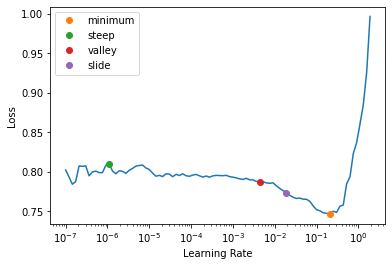

In [30]:
learn.lr_find(suggest_funcs=[minimum, steep, valley, slide])

In [31]:
learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,0.580027,0.502530,0.756829,1.652897,01:52
1,0.553900,0.492109,0.762331,1.635763,01:54
2,0.551725,0.489797,0.763938,1.631985,01:53
3,0.523183,0.478967,0.767639,1.614406,01:53
4,0.534847,0.483261,0.768808,1.621353,01:53
5,0.523930,0.478683,0.767347,1.613947,01:53
6,0.516417,0.470507,0.773044,1.600806,01:53
7,0.528130,0.468385,0.774943,1.597413,01:54
8,0.546343,0.466901,0.774797,1.595043,01:53
9,0.526519,0.469658,0.771826,1.599447,01:54


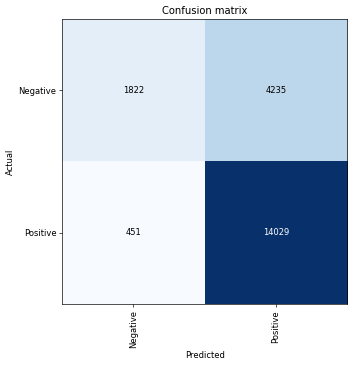

In [33]:
from fastai.vision import *

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

In [51]:
learn.predict('loves game thrones udcc cant battleofwinterfell gamefthrones battleforwinterfell udcc gosharks')

('Positive', tensor(1), tensor([0.1054, 0.8946]))

In [42]:
interp = ClassificationInterpretation.from_learner(learn)

In [48]:
interp.plot_top_losses(k=30)

,input,target,predicted,probability,loss
0,xxbos game thrones video montage haunting song nights episode florence machine jenny oldstones lyric video season 8 via,Negative,Positive,0.9550683498382568,3.1026129722595215
1,xxbos xxunk amp kennedy daily podcast kennedy xxunk guy talked xxunk mothers day dilemma game thrones xxunk xxunk,Negative,Positive,0.954647421836853,3.0932881832122803
2,xxbos look hbos game thrones season 8 episode 3 teaser,Negative,Positive,0.9462003111839294,2.9224884510040283
3,xxbos ost game thrones season 4 limited tour edition xxunk 2014 f525 ufe0f forthethrone xxunk gotfinale xxunk xxunk killemall xxunk xxunk xxunk xxunk,Negative,Positive,0.9431908130645752,2.8680570125579834
4,xxbos steaming live day stream till game thrones stop games gamer twitch xxunk overwatch apexlegends ps4 xbox,Negative,Positive,0.9408441781997681,2.8275792598724365
5,xxbos game thrones premier annual feast closest allowing inner nerd guess,Negative,Positive,0.938856840133667,2.7945375442504883
6,xxbos season 5 finale game thrones officially xxunk,Negative,Positive,0.9362850189208984,2.753335475921631
7,xxbos killed white walker xxunk xxunk martial arts bad ass,Positive,Negative,0.9360808730125427,2.7501354217529297
8,xxbos day watch game thrones ffs,Negative,Positive,0.932268500328064,2.692204713821411
9,xxbos game thrones season 8 premiere reunions ranked xxunk,Negative,Positive,0.9311501383781433,2.6758270263671875


In [49]:
interp.print_classification_report()

              precision    recall  f1-score   support

    Negative       0.80      0.30      0.44      6057
    Positive       0.77      0.97      0.86     14480

    accuracy                           0.77     20537
   macro avg       0.78      0.63      0.65     20537
weighted avg       0.78      0.77      0.73     20537

